<a href="https://colab.research.google.com/github/KgadiKatse/Other-Machine-Learning/blob/main/Ensemble_Learning_on_ARXIV_2017_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import os
import math
from sklearn import preprocessing
import csv

# Text manipulation
import nltk
import nltk.data
import ast
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import re
import sys

from sklearn.ensemble import RandomForestClassifier


# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RepeatedStratifiedKFold

# Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Alternative import

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
csv_file = input('Enter the name of your input file: ')
txt_file = input('Enter the name of your output file: ')
with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

In [ ]:
lines = []
with open('arxiv2017.txt') as f:
    lines = f.readlines()

End of alternative import

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
arxiv2017_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/applied machine learning/arxiv2017.csv', sep = ';')

In [ ]:
arxiv2017_df.head(5)

,ID,Date,Title,Abstract,Subject_area
0,0912.5014v1,26/12/2009,A User's Guide to Zot,Zot is an agile and easily extendible bounded ...,LO
1,0910.0820v2,05/10/2009,Prediction of Zoonosis Incidence in Human usin...,Zoonosis refers to the transmission of infecti...,LG
2,1505.01933v1,08/05/2015,Wireless Multicast for Zoomable Video Streaming,Zoomable video streaming refers to a new class...,NI
3,1512.02794v2,09/12/2015,On Computing the Minkowski Difference of Zonot...,Zonotopes are becoming an increasingly popular...,CG
4,cs_0701171v1,26/01/2007,The Zones Algorithm for Finding Points-Near-a-...,Zones index an N-dimensional Euclidian or metr...,DB


In [ ]:
print(f"There are {len(arxiv2017_df)} rows in the dataset.")

There are 131565 rows in the dataset.


In [ ]:
arxiv2017_df.info() # to obtain a concise summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131565 entries, 0 to 131564
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            131565 non-null  object
 1   Date          131565 non-null  object
 2   Title         131565 non-null  object
 3   Abstract      131564 non-null  object
 4   Subject_area  130671 non-null  object
dtypes: object(5)
memory usage: 5.0+ MB


In [ ]:
total_duplicate_titles = sum(arxiv2017_df["Title"].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles.")

There are 219 duplicate titles.


In [ ]:
arxiv2017_df['Date'] = pd.to_datetime(arxiv2017_df['Date'])
arxiv2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131565 entries, 0 to 131564
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ID            131565 non-null  object        
 1   Date          131565 non-null  datetime64[ns]
 2   Title         131565 non-null  object        
 3   Abstract      131564 non-null  object        
 4   Subject_area  130671 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.0+ MB


In [ ]:
arxiv2017_df1 = arxiv2017_df.copy()

In [ ]:
arxiv2017_df1['Year'] = arxiv2017_df1['Date'].dt.year
arxiv2017_df1['Month'] = arxiv2017_df1['Date'].dt.month
arxiv2017_df1['Day'] = arxiv2017_df1['Date'].dt.day
arxiv2017_df1.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
ID,0912.5014v1,0910.0820v2,1505.01933v1,1512.02794v2,cs_0701171v1,1702.06423v1,0912.3016v1,1505.02008v1,0812.4329v1,1303.6034v2
Date,2009-12-26 00:00:00,2009-05-10 00:00:00,2015-08-05 00:00:00,2015-09-12 00:00:00,2007-01-26 00:00:00,2017-02-21 00:00:00,2009-12-16 00:00:00,2015-08-05 00:00:00,2008-12-23 00:00:00,2013-03-25 00:00:00
Title,A User's Guide to Zot,Prediction of Zoonosis Incidence in Human usin...,Wireless Multicast for Zoomable Video Streaming,On Computing the Minkowski Difference of Zonot...,The Zones Algorithm for Finding Points-Near-a-...,Occupancy Counting with Burst and Intermittent...,Zone Diagrams in Euclidean Spaces and in Other...,Decomposition of Power Flow Used for Optimizin...,Some sufficient conditions on Hamiltonian digraph,ZKCM: a C++ library for multiprecision matrix ...
Abstract,Zot is an agile and easily extendible bounded ...,Zoonosis refers to the transmission of infecti...,Zoomable video streaming refers to a new class...,Zonotopes are becoming an increasingly popular...,Zones index an N-dimensional Euclidian or metr...,Zone-level occupancy counting is a critical te...,Zone diagram is a variation on the classical c...,Zonal configuration of energy market is often ...,Z-mapping graph is a balanced bipartite graph ...,ZKCM is a C++ library developed for the purpos...
Subject_area,LO,LG,NI,CG,DB,NI,CG,CE,DM,MS
Year,2009,2009,2015,2015,2007,2017,2009,2015,2008,2013
Month,12,5,8,9,1,2,12,8,12,3
Day,26,10,5,12,26,21,16,5,23,25


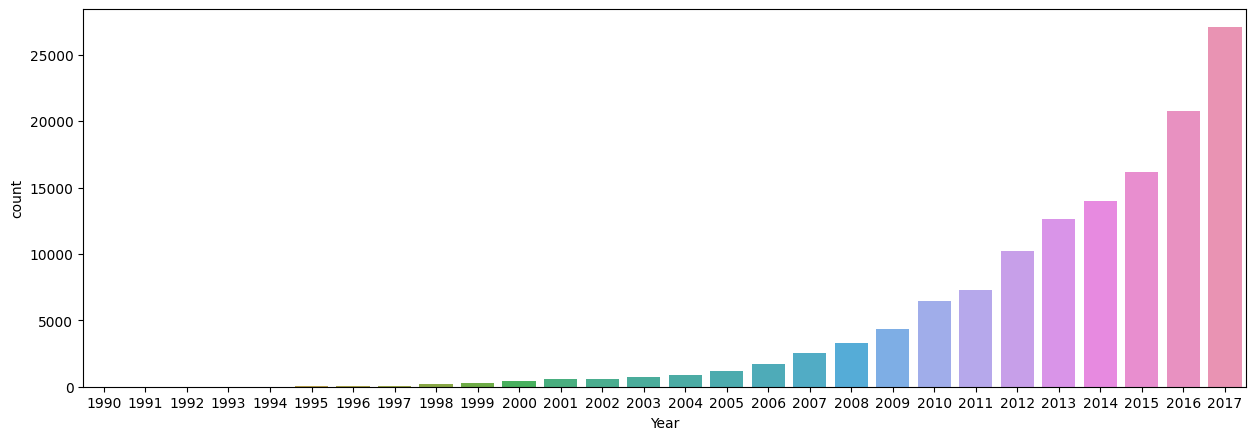

In [ ]:
plt.figure(figsize=(15,5), dpi=100);
sns.countplot(x="Year", data=arxiv2017_df1)

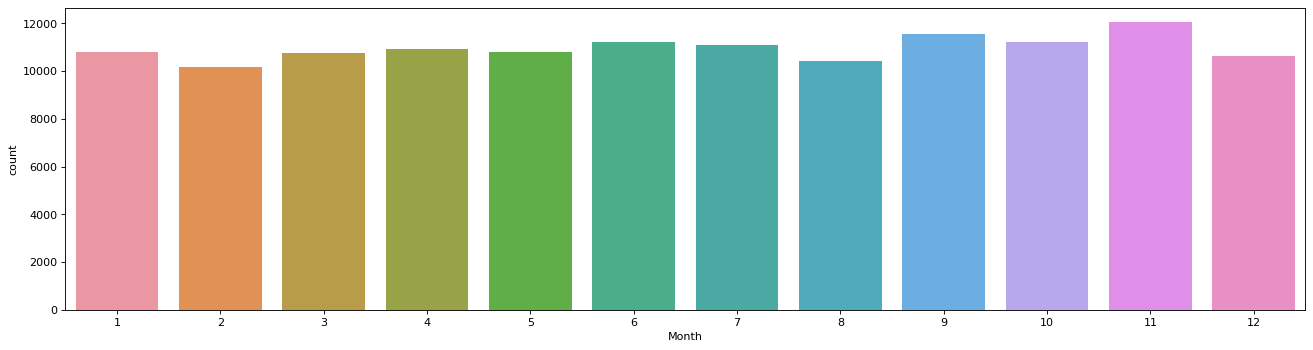

In [ ]:
plt.figure(figsize=(20,5), dpi=80);
sns.countplot(x="Month", data=arxiv2017_df1)

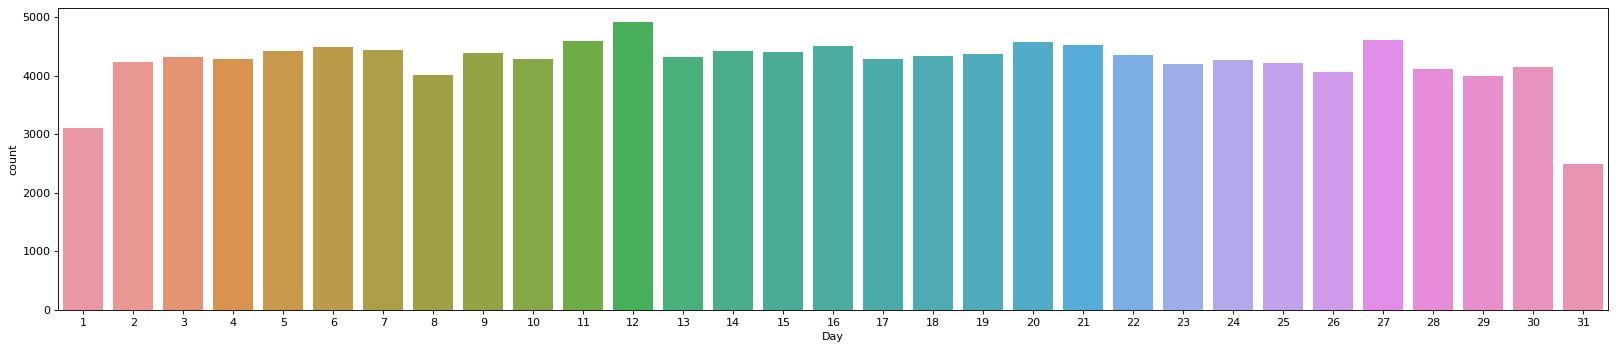

In [ ]:
plt.figure(figsize=(25,5), dpi=80);
sns.countplot(x="Day", data=arxiv2017_df1)

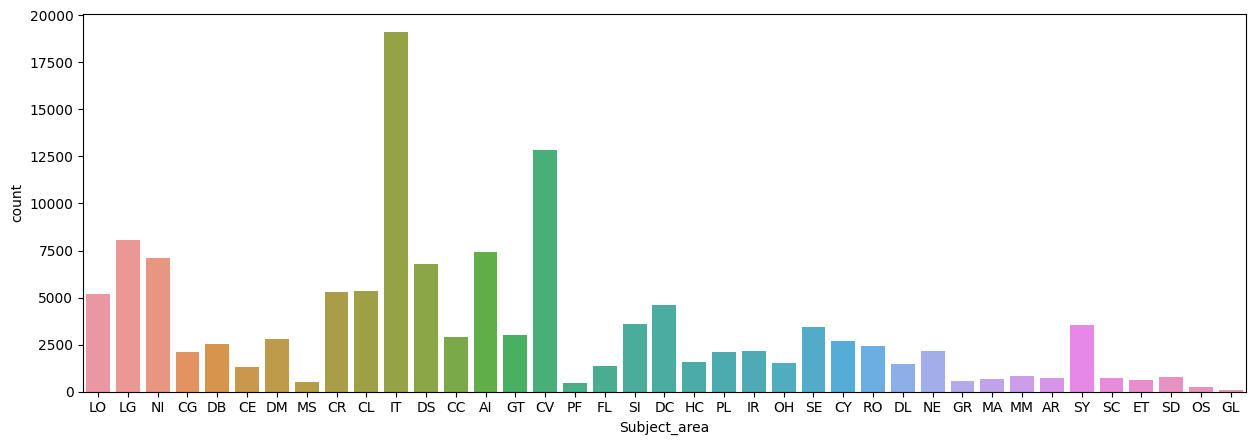

In [ ]:
plt.figure(figsize=(15,5), dpi=100);
sns.countplot(x="Subject_area", data=arxiv2017_df1)

In [ ]:
subject_areas_df1 = pd.get_dummies(arxiv2017_df1["Subject_area"])
subject_areas_df1.head(10)

,AI,AR,CC,CE,CG,CL,CR,CV,CY,DB,...,OH,OS,PF,PL,RO,SC,SD,SE,SI,SY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dropping additional features
subject_areas_df1 = subject_areas_df1.drop(['LO', 'LG', 'NI', 'CG', 'DB', 'CE', 'DM', 'MS', 'CR', 'CL', 'IT', 'DS', 'CC', 'AI', 'GT',
                                'PF', 'FL', 'SI', 'DC', 'HC', 'PL', 'IR', 'OH', 'SE', 'CY', 'RO', 'DL', 'NE', 'GR', 'MA',
                                'MM', 'AR', 'SY', 'SC', 'ET', 'SD', 'OS', 'GL'], axis=1)


In [ ]:
arxiv2017_df1['CV'] = subject_areas_df1['CV']
arxiv2017_df1.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
ID,0912.5014v1,0910.0820v2,1505.01933v1,1512.02794v2,cs_0701171v1,1702.06423v1,0912.3016v1,1505.02008v1,0812.4329v1,1303.6034v2
Date,2009-12-26 00:00:00,2009-05-10 00:00:00,2015-08-05 00:00:00,2015-09-12 00:00:00,2007-01-26 00:00:00,2017-02-21 00:00:00,2009-12-16 00:00:00,2015-08-05 00:00:00,2008-12-23 00:00:00,2013-03-25 00:00:00
Title,A User's Guide to Zot,Prediction of Zoonosis Incidence in Human usin...,Wireless Multicast for Zoomable Video Streaming,On Computing the Minkowski Difference of Zonot...,The Zones Algorithm for Finding Points-Near-a-...,Occupancy Counting with Burst and Intermittent...,Zone Diagrams in Euclidean Spaces and in Other...,Decomposition of Power Flow Used for Optimizin...,Some sufficient conditions on Hamiltonian digraph,ZKCM: a C++ library for multiprecision matrix ...
Abstract,Zot is an agile and easily extendible bounded ...,Zoonosis refers to the transmission of infecti...,Zoomable video streaming refers to a new class...,Zonotopes are becoming an increasingly popular...,Zones index an N-dimensional Euclidian or metr...,Zone-level occupancy counting is a critical te...,Zone diagram is a variation on the classical c...,Zonal configuration of energy market is often ...,Z-mapping graph is a balanced bipartite graph ...,ZKCM is a C++ library developed for the purpos...
Subject_area,LO,LG,NI,CG,DB,NI,CG,CE,DM,MS
Year,2009,2009,2015,2015,2007,2017,2009,2015,2008,2013
Month,12,5,8,9,1,2,12,8,12,3
Day,26,10,5,12,26,21,16,5,23,25
CV,0,0,0,0,0,0,0,0,0,0


In [ ]:
arxiv2017_df1 = arxiv2017_df1.drop(['Subject_area', 'Date', 'ID'], axis = 1)

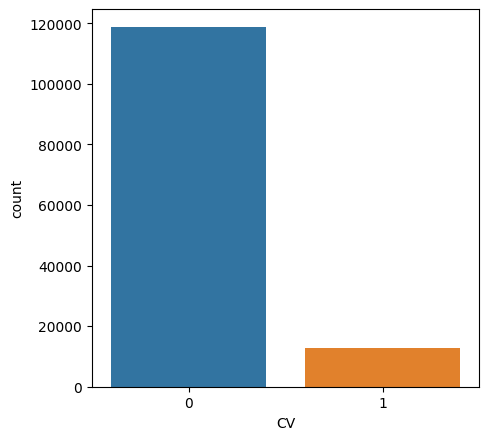

In [ ]:
plt.figure(figsize=(5,5), dpi=100);
sns.countplot(x="CV", data=arxiv2017_df1)

The Target: Subject Area
Variable Distribution in the data: CV and others


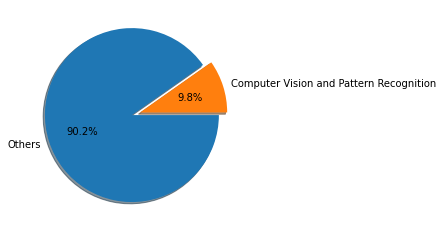

In [ ]:
# TRAINING DATA SET

labels = ['Others', 'Computer Vision and Pattern Recognition']

MAP={}
for e, i in enumerate(sorted(arxiv2017_df1['CV'].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = arxiv2017_df1.copy()
df1['CV']=df1['CV'].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mThe Target: Subject Area\nVariable Distribution in the data: CV and others'.center(55))
plt.pie(df1['CV'].value_counts(), labels=df1['CV'].value_counts().index, counterclock=False, shadow=True,
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

In [ ]:
# Percentage of missing data per column
(arxiv2017_df1.isnull().sum() / arxiv2017_df1.shape[0] * 100.00).round(2)

Title       0.0
Abstract    0.0
Year        0.0
Month       0.0
Day         0.0
CV          0.0
dtype: float64

FEATURE ENGINEERING

We cannot work with text directly when using machine learning algorithms.

Instead, we need to convert the text to numbers.

In [ ]:
arxiv2017_df2 = arxiv2017_df1.copy()

Cleaning Titles

In [ ]:
def decontract(sentence):
    # specific
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can\'t", "can not", sentence)

    # general
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    return sentence

def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', '', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub("", sentence)

In [ ]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

In [ ]:
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a',
                "N": 'n',
                "V": 'v',
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmy(sentence):
    lemmaSentence = ""
    for word in sentence.split():
        lemma = lemmatizer.lemmatize(word)
        lemmaSentence += lemma
        lemmaSentence += " "
    lemmaSentence = lemmaSentence.strip()
    return lemmaSentence
    # results in more complete words unlike stemmer
    # examples: easily - ease, making - make, comparing - compare

In [ ]:
def tokenize_tag(sentence):
  #tokenized = ""
  tagged_words = ""
  #tokenized = [word_tokenize(i) for i in sentence]
  for word in sentence.split():
    tagging = nltk.pos_tag([word_tokenize(i) for i in sentence])
    tagged_words += tagging
    tagged_words += " "
    tagged_words = tagged_words.strip()

  return tagged_words


In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [ ]:
arxiv2017_df2.head(6)

,Title,Abstract,Year,Month,Day,CV
0,A User's Guide to Zot,Zot is an agile and easily extendible bounded ...,2009,12,26,0
1,Prediction of Zoonosis Incidence in Human usin...,Zoonosis refers to the transmission of infecti...,2009,5,10,0
2,Wireless Multicast for Zoomable Video Streaming,Zoomable video streaming refers to a new class...,2015,8,5,0
3,On Computing the Minkowski Difference of Zonot...,Zonotopes are becoming an increasingly popular...,2015,9,12,0
4,The Zones Algorithm for Finding Points-Near-a-...,Zones index an N-dimensional Euclidian or metr...,2007,1,26,0
5,Occupancy Counting with Burst and Intermittent...,Zone-level occupancy counting is a critical te...,2017,2,21,0


In [ ]:
arxiv2017_df2['Title'] = arxiv2017_df2['Title'].str.lower()
arxiv2017_df2['Title'] = arxiv2017_df2['Title'].apply(decontract)
arxiv2017_df2['Title'] = arxiv2017_df2['Title'].apply(cleanPunc)
arxiv2017_df2['Title'] = arxiv2017_df2['Title'].apply(keepAlpha)
arxiv2017_df2['Title'] = arxiv2017_df2['Title'].apply(removeStopWords)
arxiv2017_df2['Title'] = arxiv2017_df2['Title'].apply(lemmatize_with_postag)
#arxiv2017_df2['Title'] = arxiv2017_df2['Title'].apply(lemmy)

In [ ]:
arxiv2017_df2.head()

,Title,Abstract,Year,Month,Day,CV
0,user guide zot,Zot is an agile and easily extendible bounded ...,2009,12,26,0
1,prediction zoonosis incidence human use season...,Zoonosis refers to the transmission of infecti...,2009,5,10,0
2,wireless multicast zoomable video stream,Zoomable video streaming refers to a new class...,2015,8,5,0
3,compute minkowski difference zonotopes,Zonotopes are becoming an increasingly popular...,2015,9,12,0
4,zone algorithm find pointsnearapoint crossmatc...,Zones index an N-dimensional Euclidian or metr...,2007,1,26,0


Cleaning Abstract

In [ ]:
arxiv2017_df2['Abstract'] = arxiv2017_df2['Abstract'].apply(str)

In [ ]:
arxiv2017_df2['Abstract'] = arxiv2017_df2['Abstract'].str.lower()
arxiv2017_df2['Abstract'] = arxiv2017_df2['Abstract'].apply(decontract)
arxiv2017_df2['Abstract'] = arxiv2017_df2['Abstract'].apply(cleanPunc)
arxiv2017_df2['Abstract'] = arxiv2017_df2['Abstract'].apply(keepAlpha)
arxiv2017_df2['Abstract'] = arxiv2017_df2['Abstract'].apply(removeStopWords)
arxiv2017_df2['Abstract'] = arxiv2017_df2['Abstract'].apply(lemmatize_with_postag)

In [ ]:
arxiv2017_df2.head(6)

,Title,Abstract,Year,Month,Day,CV
0,user guide zot,zot agile easily extendible bound model checke...,2009,12,26,0
1,prediction zoonosis incidence human use season...,zoonosis refers transmission infectious diseas...,2009,5,10,0
2,wireless multicast zoomable video stream,zoomable video stream refers new class interac...,2015,8,5,0
3,compute minkowski difference zonotopes,zonotopes become increasingly popular set repr...,2015,9,12,0
4,zone algorithm find pointsnearapoint crossmatc...,zone index ndimensional euclidian metric space...,2007,1,26,0
5,occupancy count burst intermittent signal smar...,zonelevel occupancy count critical technology ...,2017,2,21,0


Alternative cleaning:

In [ ]:
arxiv2017_df2['CV'] = arxiv2017_df2['CV'].astype(int)

In [ ]:
arxiv2017_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131565 entries, 0 to 131564
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Title     131565 non-null  object
 1   Abstract  131564 non-null  object
 2   Year      131565 non-null  int64 
 3   Month     131565 non-null  int64 
 4   Day       131565 non-null  int64 
 5   CV        131565 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 6.0+ MB


In [ ]:
def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text

Processing data...
Creating word clouds...


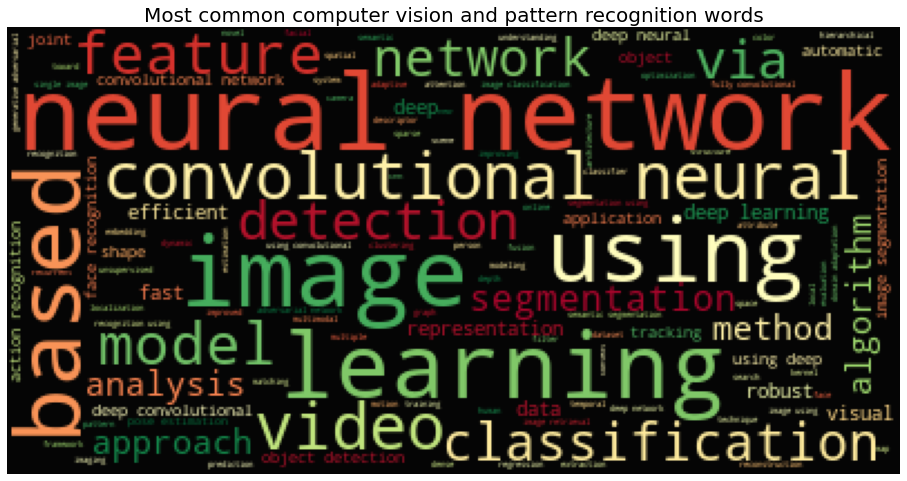

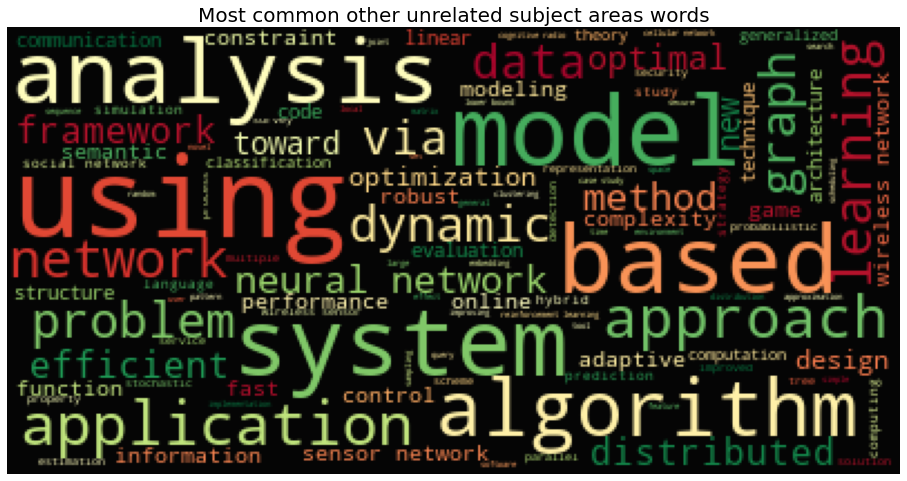

In [ ]:
def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="black", max_words=200, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='RdYlGn', random_state=1), alpha=0.98)
    plt.axis('off')

arxiv2017_n = arxiv2017_df2#.head(50000)
print("Processing data...")
arxiv2017_n['clean']=arxiv2017_n['Title'].map(clean)
arxiv2017_n['clean_text'] = arxiv2017_n['clean'].apply(lambda x: " ".join([str(word) for word in x]))

print("Creating word clouds...")
positive_words=" ".join(arxiv2017_n[arxiv2017_n['CV']==1]['clean_text'].values)
negative_words=" ".join(arxiv2017_n[arxiv2017_n['CV']==0]['clean_text'].values)

generate_wordcloud(positive_words,"computer vision and pattern recognition")
generate_wordcloud(negative_words,"other unrelated subject areas")

Preparing text as inputs for the Random Forest

Alternative 1

In [ ]:
# attempt 1
arxiv2017_df3 = arxiv2017_df2.copy()

In [ ]:
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(arxiv2017_df3['Title'])
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
#vector = vectorizer.transform([text[0]])
# summarize encoded vector
#print(vector.shape)
#print(vector.toarray())

{'user': 49219, 'guide': 18620, 'zot': 51751, 'prediction': 35742, 'zoonosis': 51747, 'incidence': 20954, 'human': 20016, 'use': 49209, 'seasonal': 40789, 'auto': 2718, 'regressive': 38483, 'integrate': 21649, 'moving': 28715, 'average': 2887, 'sarima': 40286, 'wireless': 50949, 'multicast': 28996, 'zoomable': 51741, 'video': 49835, 'stream': 44465, 'compute': 7676, 'minkowski': 27860, 'difference': 11374, 'zonotopes': 51736, 'zone': 51730, 'algorithm': 983, 'find': 15877, 'pointsnearapoint': 35032, 'crossmatching': 9132, 'spatial': 43433, 'datasets': 9921, 'occupancy': 31935, 'count': 8731, 'burst': 5095, 'intermittent': 21864, 'signal': 42106, 'smart': 42788, 'building': 5037, 'diagram': 11266, 'euclidean': 14663, 'space': 43306, 'normed': 31498, 'decomposition': 10273, 'power': 35519, 'flow': 16229, 'optimize': 32579, 'zonal': 51728, 'configuration': 7848, 'energy': 13966, 'market': 26246, 'sufficient': 44989, 'condition': 7795, 'hamiltonian': 18778, 'digraph': 11469, 'zkcm': 51711,

In [ ]:
# split the descriptive features from the target feature
arxiv2017_x = arxiv2017_df3['Title']
arxiv2017_y = arxiv2017_df3[['CV']]

Alternative 2

In [ ]:
def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer=clean)
tfidf_vect_fit=tfidf_vect.fit(arxiv2017_x)
arxiv2017_x=vectorize(arxiv2017_x,tfidf_vect_fit)
# crashede from using up all RAM - point of edit

Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(arxiv2017_x,
                                                    arxiv2017_y,
                                                    test_size=0.3,
                                                    random_state=4,
                                                    shuffle=True)

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print("Magnitude of the descriptive training features:", X_train.shape)
print("Magnitude of the target training features:", y_train.shape)
print("\nMagnitude of the descriptive test features:", X_test.shape)
print("Magnitude of the target test features:", y_test.shape)

Magnitude of the descriptive training features: (92095, 752327)
Magnitude of the target training features: (92095, 1)

Magnitude of the descriptive test features: (39470, 752327)
Magnitude of the target test features: (39470, 1)


Implementing algorithm (1)

In [ ]:
# creating a RF classifier
base_model = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
# base_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# different method of cross validation with scores using the base model above
scores = cross_val_score(base_model,X_train,y_train.values.ravel(),cv=5)
print(scores)
scores.mean()
# and then do grid search

In [ ]:
# performing predictions on the test dataset
y_train_pred = base_model.predict(X_train)
# performing predictions on the test dataset
y_test_pred = base_model.predict(X_test)

In [ ]:
# using metrics module for accuracy calculation
print("Accuracy Score on train data: ", base_model.score(X_train, y_train))

print('Confusion Matrix:')
print(confusion_matrix(y_train, y_train_pred))

print('\nClassification Report:')
print(classification_report(y_train, y_train_pred))

Accuracy Score on train data:  0.9999891416472121
Confusion Matrix:
[[83071     0]
 [    1  9023]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83071
           1       1.00      1.00      1.00      9024

    accuracy                           1.00     92095
   macro avg       1.00      1.00      1.00     92095
weighted avg       1.00      1.00      1.00     92095



In [ ]:
# using metrics module for accuracy calculation
print("Accuracy Score on test data:", base_model.score(X_test, y_test))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_test_pred))


Accuracy Score on test data: 0.9480871548011147
Confusion Matrix:
[[35219   420]
 [ 1629  2202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     35639
           1       0.84      0.57      0.68      3831

    accuracy                           0.95     39470
   macro avg       0.90      0.78      0.83     39470
weighted avg       0.94      0.95      0.94     39470



Cross Validation

In [ ]:
validation_model = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 200],
    'max_samples': [0.7, 0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4, 7, 10, 12, 15],
    'criterion' :['gini', 'entropy']
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
CV_validation_model = GridSearchCV(estimator=validation_model, scoring=None, n_jobs=-1, param_grid=param_grid, cv=cv)
CV_validation_model.fit(X_train, y_train)

CV_validation_model.best_params_

In [ ]:
# The “max_samples” argument can be set to a float between 0 and 1 to control the
# percentage of the size of the training dataset to make the bootstrap sample used
# to train each decision tree.
# Setting max_samples to “None” will make the sample size the same size as the
# training dataset and this is the default.
# The validation process below demonstrates the effect of different bootstrap sample sizes
# from 10 percent to 100 percent on the random forest algorithm.

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i, random_state=1)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))